In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt


In [2]:
with open('intents.json') as f:
    data = json.load(f)

In [3]:
tags = []
inputs = []
responses= {}
for intent in data['intents']:
  responses[intent['tag']] = intent['response']
  for lines in intent['input']:
    inputs.append(lines)
    tags.append(intent['tag'])

In [4]:
data = pd.DataFrame({"inputs":inputs,
                     "tags":tags})
data

,inputs,tags
0,Halo,sapaan
1,Hai,sapaan
2,Hi,sapaan
3,Hey,sapaan
4,Dah,akhir
5,Selamat tinggal,akhir
6,Sampai jumpa,akhir
7,terimakasih,terima kasih
8,terima kasih,terima kasih
9,Namaku $name,Nama


In [5]:
data = data.sample(frac=1)
data

,inputs,tags
7,terimakasih,terima kasih
8,terima kasih,terima kasih
3,Hey,sapaan
24,Kisaran $salary,Penghasilan
15,$degree,Pendidikan
22,$certification,Sertifikasi
4,Dah,akhir
26,$salary,Penghasilan
18,$skill,Skill
20,Menjadi $job,Pekerjaan


In [6]:
import string

data['inputs'] = data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda wrd: ''.join(wrd))
data

,inputs,tags
7,terimakasih,terima kasih
8,terima kasih,terima kasih
3,hey,sapaan
24,kisaran salary,Penghasilan
15,degree,Pendidikan
22,certification,Sertifikasi
4,dah,akhir
26,salary,Penghasilan
18,skill,Skill
20,menjadi job,Pekerjaan


In [7]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])
#apply padding
x_train = tf.keras.preprocessing.sequence.pad_sequences(train)

In [8]:
#encoding the outputs
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

In [9]:
input_shape = x_train.shape[1]
print(input_shape)

4


In [10]:
vocabulary = len(tokenizer.word_index)
print("number of unique words : ", vocabulary)
output_length = le.classes_.shape[0]
print("output length: ",output_length)

number of unique words :  33
output length:  11


In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(input_shape,)),
    tf.keras.layers.Embedding(vocabulary+1,10),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    # tf.keras.layers.LSTM(100,return_sequences=True),
    # tf.keras.layers.LSTM(50,return_sequences=True),
    # tf.keras.layers.LSTM(20,return_sequences=True),
    # tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(64, activation='relu'),
    # tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(output_length,activation="softmax")
])


In [12]:
from tensorflow.keras.layers import LSTM
chatbot_model =tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(input_shape,)),
    tf.keras.layers.Embedding(vocabulary+1,10),
    tf.keras.layers.Bidirectional(LSTM(200,return_sequences=True)),
    tf.keras.layers.Bidirectional(LSTM(100,return_sequences=True)),
    tf.keras.layers.Bidirectional(LSTM(50,return_sequences=True)),
    tf.keras.layers.LSTM(25),
    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(64, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(output_length,activation="softmax")
])

2022-05-25 11:44:37.229628: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-25 11:44:37.231228: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



In [13]:
chatbot_model.compile(loss="sparse_categorical_crossentropy",
                    optimizer='adam',
                    metrics=["accuracy"])
chatbot_model.fit(x_train,y_train,batch_size=32,epochs=200)

Epoch 1/200


2022-05-25 11:44:41.216760: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-25 11:44:43.465284: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-25 11:44:44.118247: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-25 11:44:44.129504: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-25 11:44:44.545065: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-25 11:44:44.555556: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-25 11:44:44.600495: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113

1/1 [==============================] - 4s 4s/step - loss: 2.3978 - accuracy: 0.1481
Epoch 2/200


2022-05-25 11:44:45.478128: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-25 11:44:45.500065: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 87ms/step - loss: 2.3957 - accuracy: 0.1481
Epoch 3/200
1/1 [==============================] - 0s 50ms/step - loss: 2.3934 - accuracy: 0.1481
Epoch 4/200
1/1 [==============================] - 0s 55ms/step - loss: 2.3908 - accuracy: 0.1481
Epoch 5/200
1/1 [==============================] - 0s 45ms/step - loss: 2.3877 - accuracy: 0.1481
Epoch 6/200
1/1 [==============================] - 0s 56ms/step - loss: 2.3841 - accuracy: 0.1481
Epoch 7/200
1/1 [==============================] - 0s 44ms/step - loss: 2.3797 - accuracy: 0.1481
Epoch 8/200
1/1 [==============================] - 0s 44ms/step - loss: 2.3744 - accuracy: 0.1481
Epoch 9/200
1/1 [==============================] - 0s 45ms/step - loss: 2.3679 - accuracy: 0.1481
Epoch 10/200
1/1 [==============================] - 0s 47ms/step - loss: 2.3600 - accuracy: 0.1481
Epoch 11/200
1/1 [==============================] - 0s 47ms/step - loss: 2.3506 - accuracy: 0.1481
Epoch 12/200
1/1 [============

Text(0.5, 0, 'epoch')

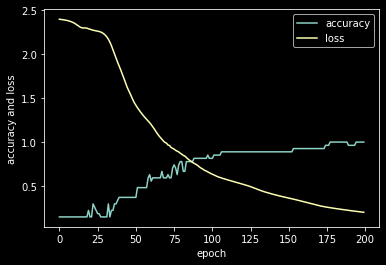

In [15]:
plt.plot(chatbot_model.history.history["accuracy"])
plt.plot(chatbot_model.history.history["loss"])
plt.ylabel("accuracy and loss")
plt.legend(["accuracy","loss"])
plt.xlabel("epoch")

In [16]:
chatbot_model.evaluate(x_train,y_train)

2022-05-25 11:45:33.348857: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-25 11:45:33.658988: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-25 11:45:33.670462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-25 11:45:33.758154: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-25 11:45:33.766711: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-25 11:45:33.826181: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-25 11:45:33.834214: I tensorflow/core/grappler/optimizers/cust

1/1 [==============================] - 1s 1s/step - loss: 0.1989 - accuracy: 1.0000


2022-05-25 11:45:33.889040: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[0.1988520622253418, 1.0]

In [21]:
chatbot_model.save('/machine-learning/model/chatbot_model.h5')


PermissionDeniedError: /machine-learning; Read-only file system

In [25]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history=model.fit(x_train,y_train,epochs=200)

Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 2.3965 - accuracy: 0.0370
Epoch 2/200
1/1 [==============================] - 0s 7ms/step - loss: 2.3948 - accuracy: 0.2222
Epoch 3/200
1/1 [==============================] - 0s 7ms/step - loss: 2.3931 - accuracy: 0.2222
Epoch 4/200
1/1 [==============================] - 0s 7ms/step - loss: 2.3914 - accuracy: 0.2593
Epoch 5/200
1/1 [==============================] - 0s 7ms/step - loss: 2.3898 - accuracy: 0.2593
Epoch 6/200
1/1 [==============================] - 0s 8ms/step - loss: 2.3882 - accuracy: 0.2593
Epoch 7/200
1/1 [==============================] - 0s 7ms/step - loss: 2.3865 - accuracy: 0.2593
Epoch 8/200
1/1 [==============================] - 0s 7ms/step - loss: 2.3849 - accuracy: 0.2593
Epoch 9/200
1/1 [==============================] - 0s 8ms/step - loss: 2.3832 - accuracy: 0.2593
Epoch 10/200
1/1 [==============================] - 0s 7ms/step - loss: 2.3815 - accuracy: 0.2593
Epoch 11/200
1/1 [============

In [18]:
model.evaluate(x_train,y_train)

1/1 [==============================] - 2s 2s/step - loss: 0.5474 - accuracy: 0.9259


[0.5474383234977722, 0.9259259104728699]

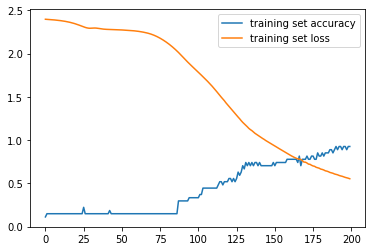

In [19]:
plt.plot(history.history['accuracy'],label='training set accuracy')
plt.plot(history.history['loss'],label='training set loss')
plt.legend()